### Minimum Daily Temperatures Dataset
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.
The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology



In [23]:
### Importing the required necessary libraries

In [55]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

In [56]:
# Read the data set

In [57]:

series = pd.read_csv('datasets/daily-min-temperatures.csv')

In [58]:
series.head() # reading the dataset

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


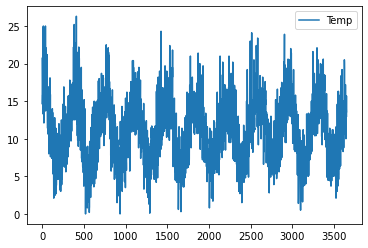

In [59]:
# plot the dataset
series.plot()
pyplot.show()

### Quick Check for Autocorrelation
***Plots the temperature data (t) on the x-axis against the temperature on the previous day (t-1) on the y-axis.***

***This could be done manually by first creating a lag version of the time series dataset and using a built-in scatter plot function in the Pandas library.***

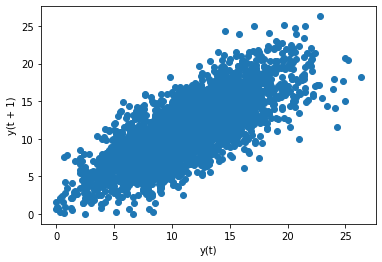

In [17]:

from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
lag_plot(series)
pyplot.show()

- ***The example below creates a lagged version of the Minimum Daily Temperatures dataset and calculates a correlation matrix of each column with other columns, including itself.***
- ***Statistical test like the Pearson correlation coefficient. This produces a number to summarize how correlated two variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation and high values above 0.5 or below -0.5 showing high correlation.***

In [42]:
#Correlation Matrix of each column with other column
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


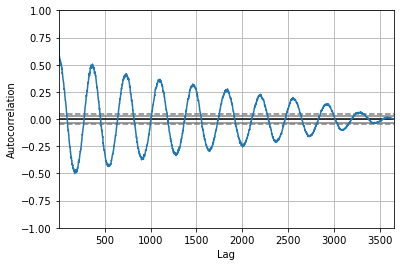

In [19]:
# Plotting autocorrelation 
autocorrelation_plot(series) # 
pyplot.show()


- ***Swing in positive and negative correlation as the temperature values change across summer and winter seasons each previous year*** 

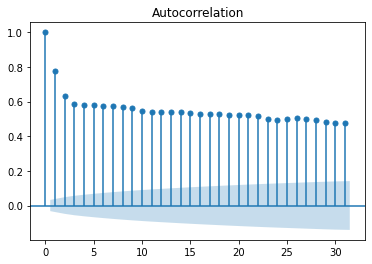

In [20]:
# We limit the lag to 31 .
plot_acf(series, lags=31)
pyplot.show()

# Autoregression Model
### An autoregression model is a linear regression model that uses lagged variables as input variables.


In [37]:
# Split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

In [40]:
# Create and evaluate a static autoregressive model
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


  warnings.warn(


In [44]:
### Then we plot the expected vs predicted values (red) is made

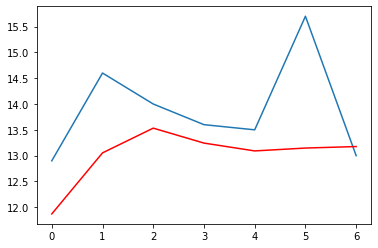

In [35]:
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()